<a href="https://colab.research.google.com/github/ketanp23/scsd-ddm-class/blob/main/KMeansClustering_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will use location data (latitude and longitude) as well as the median house value. We will cluster the houses by location and observe how house prices fluctuate across California.

In [1]:
import pandas as pd

home_data = pd.read_csv('housing.csv', usecols = ['longitude', 'latitude', 'median_house_value'])
home_data.head()

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0


The data include 3 variables that we have selected using the usecols parameter:

longitude: A value representing how far west a house is. Higher values represent houses that are further West.

latitude: A value representing how far north a house is. Higher values represent houses that are further north.

median_house_value: The median house price within a block measured in USD.

<Axes: xlabel='longitude', ylabel='latitude'>

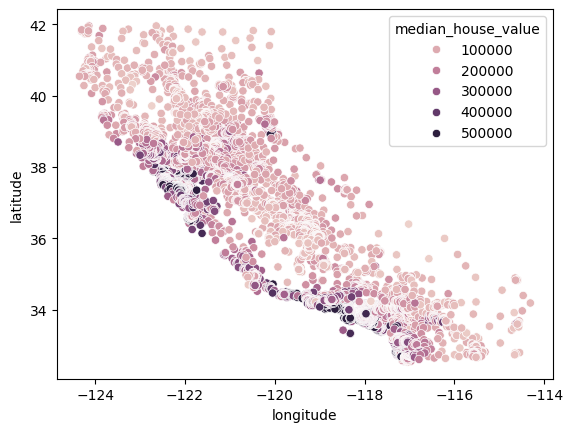

In [2]:
import seaborn as sns

sns.scatterplot(data = home_data, x = 'longitude', y = 'latitude', hue = 'median_house_value')

We see that most of the expensive houses are on the west coast of California with different areas that have clusters of moderately priced houses. This is expected as typically waterfront properties are worth more than houses that are not on the coast.

Clusters are often easy to spot when you are only using 2 or 3 features. It becomes increasingly difficult or impossible when the



When working with distance-based algorithms, like k-Means Clustering, we must normalize the data. If we do not normalize the data, variables with different scaling will be weighted differently in the distance formula that is being optimized during training. For example, if we were to include price in the cluster, in addition to latitude and longitude, price would have an outsized impact on the optimizations because its scale is significantly larger and wider than the bounded location variables.

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(home_data[['latitude', 'longitude']], home_data[['median_house_value']], test_size=0.33, random_state=0)

In [4]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

For the first iteration, we will arbitrarily choose a number of clusters (referred to as k) of 3. Building and fitting models in sklearn is very simple. We will create an instance of KMeans, define the number of clusters using the n_clusters attribute, set n_init, which defines the number of iterations the algorithm will run with different centroid seeds, to “auto,” and we will set the random_state to 0 so we get the same result each time we run the code.  We can then fit the model to the normalized training data using the fit() method.

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, random_state=0)

<Axes: xlabel='longitude', ylabel='latitude'>

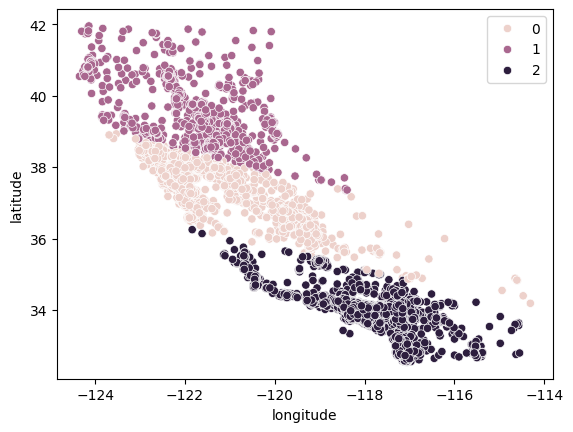

In [7]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = kmeans.labels_)

We see that the data are now clearly split into 3 distinct groups (Northern California, Central California, and Southern California). We can also look at the distribution of median house prices in these 3 groups using a boxplot.



<Axes: ylabel='median_house_value'>

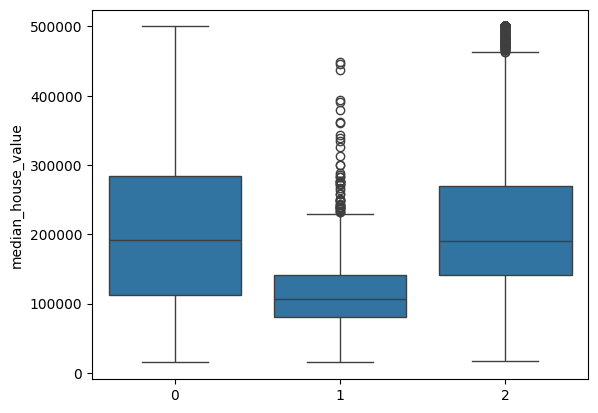

In [8]:
sns.boxplot(x = kmeans.labels_, y = y_train['median_house_value'])

We clearly see that the Northern and Southern clusters have similar distributions of median house values (clusters 0 and 2) that are higher than the prices in the central cluster (cluster 1).

We can evaluate performance of the clustering algorithm using a Silhouette score which is a part of sklearn.metrics where a lower score represents a better fit.



In [10]:
from sklearn.metrics import silhouette_score

silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

np.float64(0.7499371920703546)

The Silhouette score is a metric used to assess the quality of clustering results, particularly in algorithms like K-means. It quantifies how well each data point fits within its assigned cluster and how distinct it is from other clusters, with values ranging from -1 to +1. Higher scores indicate better clustering, meaning data points are well-clustered within their groups and far from other clusters.




In [12]:
K = range(2, 8)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_train_norm)

    # append the model to fits
    fits.append(model)

    # Append the silhouette score to scores
    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

print(score)

[np.float64(0.7754128527515257), np.float64(0.7499371920703546), np.float64(0.6720696983328215), np.float64(0.6194278731357918), np.float64(0.6298291338973422), np.float64(0.6411527462975639)]
